# Examples for data plotting with Colaboratory

This notebook contains various examples how to plot pandas DataFrames. Mostly for my quick reference for me besides the [Altair example list](https://altair-viz.github.io/gallery/), but might be useful for you, too. Since as of now (08/19) mathplotlib is not interactive in Colaboratory :-( , the examples are mostly using [Altair](https://altair-viz.github.io/), unless pandas or mathplotlib offer something substantially easier.

In [7]:
##@title Imports and utilities {display-mode: "form"}

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
print([pd.__version__, plt.matplotlib.__version__,np.__version__])

from IPython.core.pylabtools import figsize
figsize(12.5, 3)  # bigger plots for matplotlib
# %config IPCompleter.greedy=True

def sample(df : pd.DataFrame, samplenum=5000) -> pd.DataFrame:
  """Reduces the dataframe to at most samplenum rows to comply with Altairs data size limitations."""
  samples = min(samplenum,df.size)/df.size
  return df.sample(samples)

['0.24.2', '3.0.3', '1.16.4']


## Some testdata

In [0]:
steps=20
data = pd.DataFrame(np.mgrid[0:steps:1, 0:steps:1].reshape(2,-1).T / steps, columns=['x','y'])
data['z1']=np.sin(data.x * 7) + data.x
data['z2']=np.sin(data.x * data.y + data.x)

alt.data_transformers.disable_max_rows()
len = 20000
sdata = pd.DataFrame({'x': np.random.rand(len), 'y': np.random.rand(len)})
sdata['z1'] = np.sin(sdata.x * 7) + sdata.x + np.random.rand(len) * (1-np.square(sdata.x) / 2) - 0.5
sdata['z2'] = sdata.x + sdata.x * sdata.y + np.random.rand(len) * (1-np.square(sdata.y) / 2) - 0.5
sdata['z3'] = sdata.y + np.random.rand(len) * (1-np.square(sdata.x) / 2) - 0.5

# sdata.describe().T

## One dimensional plots

In [9]:
alt.Chart(data).mark_line().encode( alt.X('x:Q'), alt.Y('z1:Q')).interactive() | \
alt.Chart(sdata.sample(500)).mark_point().encode( alt.X('x:Q'), alt.Y('z1:Q')).interactive() | \
alt.Chart(sdata).mark_bar().encode( x=alt.X('z1:Q', bin=alt.Bin(maxbins=50) ), y=alt.Y('count()', scale=alt.Scale(type='log'))).interactive(bind_y=False)

alt.HConcatChart(...)

## Two dimensional plots

In [10]:
alt.Chart(data).mark_rect().encode( alt.X('x:O'), alt.Y('y:O'), alt.Color('z2:Q')) | \
alt.Chart(sdata).mark_rect().encode( alt.X('x:Q', bin=alt.Bin(maxbins=60)), alt.Y('y:Q', bin=alt.Bin(maxbins=40)), alt.Color('mean(z2):Q'))

alt.HConcatChart(...)

In [11]:
alt.Chart(sdata).mark_rect().encode( alt.X('x:Q', bin=alt.Bin(maxbins=60)), alt.Y('y:Q', bin=alt.Bin(maxbins=40)), alt.Color('mean(z2):Q')) + \
alt.Chart(sdata).mark_circle().encode( alt.X('x:Q', bin=alt.Bin(maxbins=60)), alt.Y('y:Q', bin=alt.Bin(maxbins=40)), size=('variance(z2):Q')) | \
alt.Chart(sdata.sample(500)).mark_point().encode( alt.X('x:Q'), alt.Y('z1:Q'), alt.Color('z3:Q', scale=alt.Scale(scheme='spectral'))).interactive()

alt.HConcatChart(...)

## Other stuff

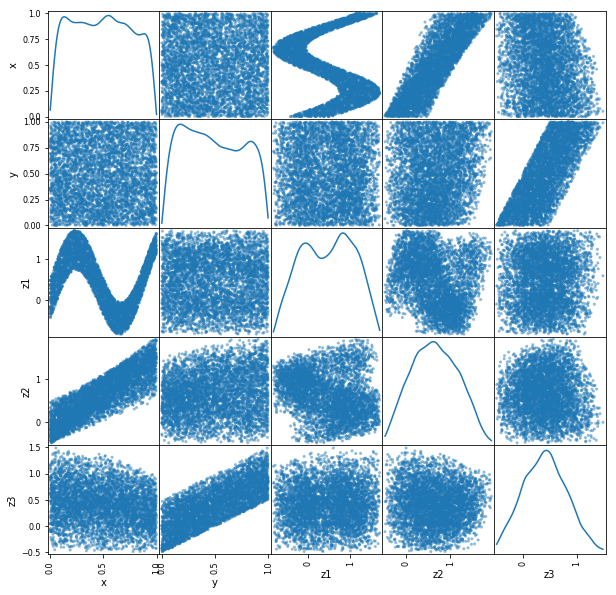

In [12]:
pd.plotting.scatter_matrix(sdata.sample(5000), figsize=(10, 10), diagonal='kde');